In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.columns
col = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
x_train = data[col]
y_train = data['Survived']

In [5]:
x_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [7]:
def format(data):
    data.drop(['Cabin', 'Name', 'Ticket'], axis = 1, inplace = True)
    data.fillna(data.mean(), inplace = True)
    data['Sex'] = data['Sex'].map({'male':1, 'female':0})
    data['Embarked'] = data['Embarked'].apply(lambda x : str(x))
    data['Embarked'] = data['Embarked'].map({'S':1, 'C':2, 'Q':3, 'nan' : 1})
    return data

In [8]:
train_x = format(x_train.copy())
train_x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,1
1,2,1,0,38.0,1,0,71.2833,2
2,3,3,0,26.0,0,0,7.9250,1
3,4,1,0,35.0,1,0,53.1000,1
4,5,3,1,35.0,0,0,8.0500,1


In [9]:
train_x['Embarked'].value_counts()

1    646
2    168
3     77
Name: Embarked, dtype: int64

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [28]:
scaler = StandardScaler()

In [29]:
train_x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,1
1,2,1,0,38.0,1,0,71.2833,2
2,3,3,0,26.0,0,0,7.9250,1
3,4,1,0,35.0,1,0,53.1000,1
4,5,3,1,35.0,0,0,8.0500,1


In [30]:
x = scaler.fit_transform(train_x.copy())

In [49]:
pca = PCA(n_components = 2)

In [50]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [51]:
x_pca = pca.transform(x)

In [52]:
x.shape

(891, 8)

In [53]:
x_pca.shape

(891, 2)

In [54]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Text(0, 0.5, 'Second')

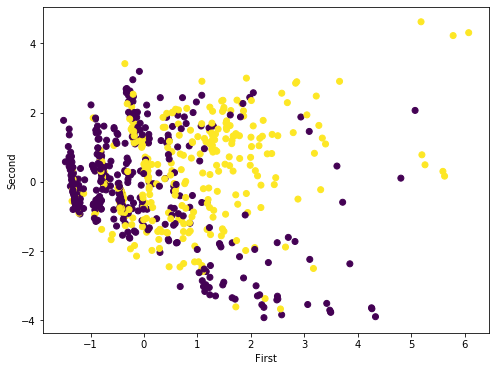

In [151]:
plt.figure(figsize = (8, 6))
plt.scatter(x_pca[:,0], x_pca[:,1], c = y_train)
plt.xlabel('First')
plt.ylabel('Second')

In [149]:
mlp = MLPClassifier(hidden_layer_sizes = [100, 50, 25, 10], activation = 'relu').fit(x_pca, y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [150]:
mlp.score(x_pca, y_train)

0.7732884399551067

In [90]:
svm = SVC().fit(x_pca, y_train)

In [91]:
svm.score(x_pca, y_train)

0.7598204264870931

In [92]:
dt = DecisionTreeClassifier().fit(x_pca, y_train)

In [105]:
dt.score(x_pca, y_train)

1.0

In [141]:
rf = RandomForestClassifier(n_estimators=10, max_depth = 10).fit(x_pca, y_train)

In [142]:
rf.score(x_pca, y_train)

0.9259259259259259

In [143]:
test = pd.read_csv("test.csv")
x_test = format(test.copy())
x_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,3
1,893,3,0,47.0,1,0,7.0000,1
2,894,2,1,62.0,0,0,9.6875,3
3,895,3,1,27.0,0,0,8.6625,1
4,896,3,0,22.0,1,1,12.2875,1


In [144]:
t = scaler.fit_transform(x_test)
t1 = pca.fit_transform(t)

In [145]:
pred = rf.predict(t1)

In [146]:
ans = pd.DataFrame(data = [x_test['PassengerId'], pred])

In [147]:
ans = ans.T
ans.columns = ['PassengerId', 'Survived']
ans.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,0
4,896,0


In [148]:
ans.to_csv("ans.csv", index = False)